In [1]:
from Classes.LoadModel import BaseModel
from Classes.Predict import Prediction
from Classes.Summarize import *
from Classes.Multiclass_model import *
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Layer, Input, Dropout, Activation, Convolution2D, MaxPooling2D, GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Conv2D, MaxPool2D, Dropout, Flatten, LeakyReLU, BatchNormalization)
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_VGG16

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
# Start images processing and dataframe splitting
Multi = Multiclass_Model('/home/ubuntu/jonathan/files_list.csv')
trainer = Train('/home/ubuntu/jonathan/files_list.csv', '/home/ubuntu/sheryl/face_att_sheryl')

In [3]:
data = pd.read_csv('/home/ubuntu/jonathan/files_list.csv')
data.head()

,Unnamed: 0,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,0_5_o_Clock_Shadow,0_Arched_Eyebrows,0_Attractive,0_Bags_Under_Eyes,0_Bald,0_Bangs,0_Big_Lips,0_Big_Nose,0_Black_Hair,0_Blond_Hair,0_Blurry,0_Brown_Hair,0_Bushy_Eyebrows,0_Chubby,0_Double_Chin,0_Eyeglasses,0_Goatee,0_Gray_Hair,0_Heavy_Makeup,0_High_Cheekbones,0_Male,0_Mouth_Slightly_Open,0_Mustache,0_Narrow_Eyes,0_No_Beard,0_Oval_Face,0_Pale_Skin,0_Pointy_Nose,0_Receding_Hairline,0_Rosy_Cheeks,0_Sideburns,0_Smiling,0_Straight_Hair,0_Wavy_Hair,0_Wearing_Earrings,0_Wearing_Hat,0_Wearing_Lipstick,0_Wearing_Necklace,0_Wearing_Necktie,0_Young
0,0,face_att_000007.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000051.jpg,face_att_000009.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000007.jpg,face_att_000013.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000007.jpg,face_att_000020.jpg,face_att_000047.jpg,face_att_000053.jpg,face_att_000020.jpg,face_att_000021.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000109.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000009.jpg,face_att_000019.jpg,face_att_000001.jpg,face_att_000025.jpg,face_att_000009.jpg,face_att_000020.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000037.jpg,face_att_000001.jpg,face_att_000004.jpg,face_att_000015.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000016.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000015.jpg
1,1,face_att_000008.jpg,face_att_000005.jpg,face_att_000004.jpg,face_att_000007.jpg,face_att_000079.jpg,face_att_000029.jpg,face_att_000005.jpg,face_att_000007.jpg,face_att_000008.jpg,face_att_000018.jpg,face_att_000049.jpg,face_att_000002.jpg,face_att_000012.jpg,face_att_000031.jpg,face_att_000051.jpg,face_att_000093.jpg,face_att_000060.jpg,face_att_000051.jpg,face_att_000005.jpg,face_att_000002.jpg,face_att_000007.jpg,face_att_000002.jpg,face_att_000209.jpg,face_att_000005.jpg,face_att_000002.jpg,face_att_000012.jpg,face_att_000048.jpg,face_att_000003.jpg,face_att_000031.jpg,face_att_000018.jpg,face_att_000037.jpg,face_att_000002.jpg,face_att_000004.jpg,face_att_000006.jpg,face_att_000004.jpg,face_att_000068.jpg,face_att_000004.jpg,face_att_000014.jpg,face_att_000021.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000003.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000004.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000004.jpg,face_att_000002.jpg,face_att_000004.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000020.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000006.jpg,face_att_000

In [4]:
print('Reading File...')
print(f'Preparing data.. \nCreating Train, Test...')

label_list = ['Brown_Hair','Blond_Hair', 'Black_Hair','Bald', 'Gray_Hair']
train, test = Multi.create_dataframe_multi(label_list, 4500)
print('Done!')

Reading File...
Preparing data.. 
Creating Train, Test...
Assertions Passed! Sets  Are of image files W/O Duplication
Done!


In [5]:
# Split Train, Validation and Test Sets
from tensorflow.keras.applications.resnet50 import preprocess_input as Preprocess_RESNET
print(f'\nRunning data generator...')
model_name = 'ResNet50'
train_data, valid_data, test_data = Multi.generator_splitter_multi(model_name, train, test, '/home/ubuntu/sheryl/face_att_sheryl')


Running data generator...
Found 13804 validated image filenames belonging to 5 classes.
Found 3450 validated image filenames belonging to 5 classes.
Found 4494 validated image filenames.


In [6]:
print(f'\n\nLoading Model...')
print('Pick a Model: vgg19, MobileNetV2, vggface, facenet, emotion, age, gender, race')
label_name = 'Hair_color'
model_file = os.path.join('Weights/', model_name + '7_' + label_name + '.h5')
json_path = os.path.join('json/', model_name + '7_' + label_name + '.json')
epoch = 100



Loading Model...
Pick a Model: vgg19, MobileNetV2, vggface, facenet, emotion, age, gender, race


In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in base_model.layers:
     layer.trainable = False
     
# Build the classification layers on top of the base VGG16 base layers for the dataset
model = tf.keras.Sequential(base_model)

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(5, activation = 'softmax'))

# model.compile(optimizer=tf.keras.optimizers.Adam(), 
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               51380736  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1

In [8]:
history, model = trainer.start_train(model, model_file, train_data, valid_data, epoch, multi=True,
                                     callback=None,
                                     optimize=None)
print('Loading best weights...')
model.load_weights(model_file)
print('Done!')

# Saving History
with open(json_path, 'w') as f:
    json.dump(history.history, f)
history = json.load(open(json_path))

Epoch 1/100
215/215 [==============================] - ETA: 0s - loss: 0.9807 - accuracy: 0.6291
Epoch 00001: val_loss improved from inf to 0.60332, saving model to Weights/ResNet507_Hair_color.h5
215/215 [==============================] - 97s 451ms/step - loss: 0.9807 - accuracy: 0.6291 - val_loss: 0.6033 - val_accuracy: 0.7821
Epoch 2/100
215/215 [==============================] - ETA: 0s - loss: 0.6330 - accuracy: 0.7648
Epoch 00002: val_loss improved from 0.60332 to 0.52850, saving model to Weights/ResNet507_Hair_color.h5
215/215 [==============================] - 99s 461ms/step - loss: 0.6330 - accuracy: 0.7648 - val_loss: 0.5285 - val_accuracy: 0.8069
Epoch 3/100
215/215 [==============================] - ETA: 0s - loss: 0.5091 - accuracy: 0.8133
Epoch 00003: val_loss improved from 0.52850 to 0.48257, saving model to Weights/ResNet507_Hair_color.h5
215/215 [==============================] - 99s 461ms/step - loss: 0.5091 - accuracy: 0.8133 - val_loss: 0.4826 - val_accuracy: 0.8287

In [9]:
# Evaluate the network on valid data
Prediction.evaluate_model(model, valid_data)

Evaluating the network ...
54/54 [==============================] - 18s 330ms/step - loss: 0.4376 - accuracy: 0.8475
Validation Loss:	0.438
Validation Acc.:	0.848


In [10]:
labels = (train_data.class_indices)
labels

{'Bald': 0, 'Black_Hair': 1, 'Blond_Hair': 2, 'Brown_Hair': 3, 'Gray_Hair': 4}

In [11]:
# Predict on test data
y_pred = Prediction.test_prediction(model, test_data, train_data)

Starting prediction...
Done!


In [12]:
# plot
top = min(len(test['label']), len(y_pred))
metrics = Metrics(history, epoch, test['label'][:top].tolist(), y_pred[:top], model_name, label_name)
metrics.confusion_matrix()

Confusion Matrix ...
          0         1         2         3         4
0  0.842984  0.021158  0.000000  0.004454  0.131403
1  0.013468  0.811448  0.002245  0.166105  0.006734
2  0.001114  0.003341  0.885301  0.054566  0.055679
3  0.000000  0.090503  0.094972  0.784358  0.030168
4  0.174833  0.018931  0.044543  0.021158  0.740535


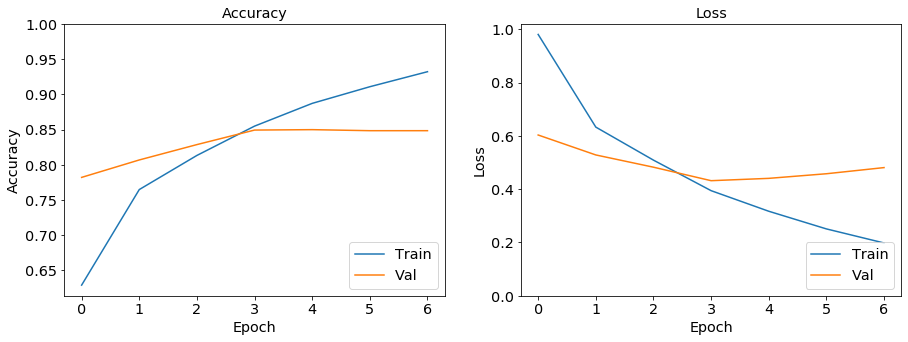

In [13]:
metrics.acc_loss_graph()

In [14]:
from sklearn.metrics import classification_report
top = min(len(test['label']), len(y_pred))
print(classification_report(test['label'][:top].tolist(), y_pred[:top]))

              precision    recall  f1-score   support

        Bald       0.82      0.84      0.83       898
  Black_Hair       0.86      0.81      0.83       891
  Blond_Hair       0.86      0.89      0.87       898
  Brown_Hair       0.76      0.78      0.77       895
   Gray_Hair       0.77      0.74      0.75       898

    accuracy                           0.81      4480
   macro avg       0.81      0.81      0.81      4480
weighted avg       0.81      0.81      0.81      4480



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test['label'][:top].tolist(), y_pred[:top], labels=['Bald', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Gray_Hair'])

array([[757,  19,   0,   4, 118],
       [ 12, 723,   2, 148,   6],
       [  1,   3, 795,  49,  50],
       [  0,  81,  85, 702,  27],
       [157,  17,  40,  19, 665]])